In [30]:
# Clone the repository
system("git clone https://github.com/focccus/MVE550-Stochastic-processes.git")
# Check the cloned repository
setwd("MVE550-Stochastic-processes/A2")
system("ls",intern = TRUE)

[1] "assignment2.ipynb"           "assignment-2.pdf"           
 [3] "assignment_files"            "assignment.tex"             
 [5] "assignment.typ"              "branching_process.png"      
 [7] "branching.R"                 "dataAssignment2.txt"        
 [9] "MVE550-Stochastic-processes" "RcodeLecture6.R"            
[11] "RcodeLecture7.R"             "RcodeLecture8.R"

In [31]:
data = read.table("dataAssignment2.txt",header=TRUE)
head(data, 10)

,x,y,z
,<dbl>,<dbl>,<int>
1,1.144,19.1,0
2,1.439,16.5,1
3,1.260,23.5,1
4,0.921,20.7,1
5,1.570,20.0,1
6,0.446,18.9,0
7,0.641,17.2,0
8,1.012,23.4,1
9,1.626,18.0,0


## 1a) Visualize the data


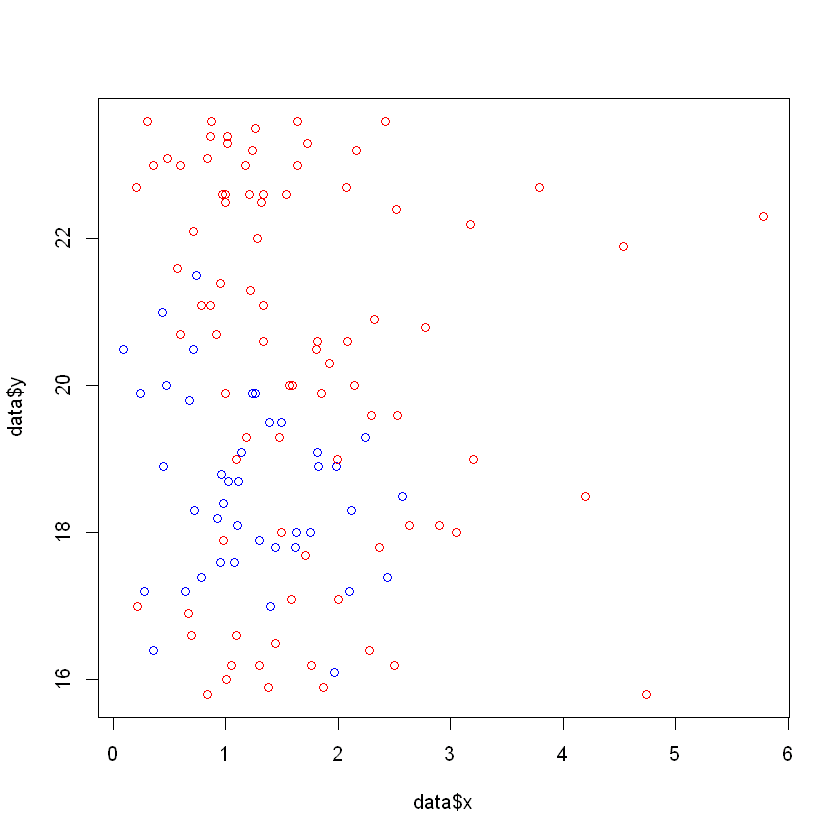

In [ ]:
plot(data$x, data$y, col=ifelse(data$z, "red", "blue"))

## 1b) What is the likelihood and posterior?
Using the model above and the function f , write down the likelihood of the data (i.e., a formula for the probability of the data given the parameters of the model).
Also, write down a function that is proportional to the posterior density for the parameters.

1. Likelihood of the Data
Given:
- $$f(x, y, \theta_1, \theta_2, \theta_3) = \frac{\exp(e^{\theta_1} x + e^{\theta_2} (y - \theta_3)^2) - 1}{\exp(e^{\theta_1} x + e^{\theta_2} (y - \theta_3)^2) + 1}$$
- The model outputs p, the probability of an animal developing the disease
- $$D = \{(x_i, y_i, z_i)\}_{i=1}^N$$ is the observed data, where:
  - $$x_i, y_i$$ are the pollutant concentration and temperature,are the pollutant concentration and temperature
  - $$z_i$$ is the binary outcome indicating whether the animal developed the disease $$z_i = 1$$ or not $$z_i = 0$$

The likelihood of the data is the joint probability of observing $$z_i$$ for all animals, assuming independence:

$$P(D \mid \theta_1, \theta_2, \theta_3) = \prod_{i=1}^N P(z_i \mid x_i, y_i, \theta_1, \theta_2, \theta_3).$$

Substituting $$P(z_i \mid x_i, y_i, \theta_1, \theta_2, \theta_3)$$:
- If $$z_i = 1$$, $$P(z_i \mid x_i, y_i, \theta_1, \theta_2, \theta_3) = f(x_i, y_i, \theta_1, \theta_2, \theta_3)$$
- If $$z_i = 0$$, $$P(z_i \mid x_i, y_i, \theta_1, \theta_2, \theta_3) = 1 - f(x_i, y_i, \theta_1, \theta_2, \theta_3)$$

Thus, the likelihood is:
$$P(D \mid \theta_1, \theta_2, \theta_3) = \prod_{i=1}^N \left[ f(x_i, y_i, \theta_1, \theta_2, \theta_3)^{z_i} \cdot \left(1 - f(x_i, y_i, \theta_1, \theta_2, \theta_3)\right)^{1 - z_i} \right].$$


2. Posterior Density (Proportional Function)

From Bayes' theorem:

$$P(\theta_1, \theta_2, \theta_3 \mid D) \propto P(D \mid \theta_1, \theta_2, \theta_3) P(\theta_1, \theta_2, \theta_3).$$

- The prior $$P(\theta_1, \theta_2, \theta_3)$$ is flat, so it is a constant.
- Thus, $$P(\theta_1, \theta_2, \theta_3 \mid D) \propto P(D \mid \theta_1, \theta_2, \theta_3)$$

Therefore:

$$P(\theta_1, \theta_2, \theta_3 \mid D) \propto \prod_{i=1}^N \left[ f(x_i, y_i, \theta_1, \theta_2, \theta_3)^{z_i} \cdot \left(1 - f(x_i, y_i, \theta_1, \theta_2, \theta_3)\right)^{1 - z_i} \right].$$

In [58]:
# Define the function f(x, y, theta1, theta2, theta3)
f <- function(x, y, theta1, theta2, theta3) {
  exp_part <- exp(exp(theta1) * x + exp(theta2) * (y - theta3)^2)
  p <- (exp_part - 1) / (exp_part + 1)
  return(p)
}

# Define the likelihood function
likelihood <- function(data, theta1, theta2, theta3) {
  # Extract x, y, z from the data
  x <- data$x
  y <- data$y
  z <- data$z

  # Calculate probabilities for all data points
  p <- f(x, y, theta1, theta2, theta3)
  # Compute the likelihood
  cat("P:",p,"\n")
  #likelihood_vals <- z * log(p) + (1 - z) * log(1 - p)
  #likelihood_vals <- p^z + (1-p)^(1-z)
  likelihood_vals <- ifelse(z==1,p,1-p)
  #total_likelihood <- sum(likelihood_vals)
  total_likelihood <- prod(likelihood_vals)
  #return(exp(total_likelihood))
  return(total_likelihood)
}

# Define a function proportional to the posterior density
posterior <- function(data, theta1, theta2, theta3) {
  # Flat prior (improper) implies P(theta1, theta2, theta3) ∝ 1, so posterior ∝ likelihood
  return(likelihood(data, theta1, theta2, theta3))
}

# Example usage
# Simulated dataset
set.seed(42)

# Parameters to test
theta1 <- -0.001
theta2 <- 0.001
theta3 <- mean(data$y)

# Calculate the likelihood and posterior for the given parameters
likelihood_val <- likelihood(data, theta1, theta2, theta3)
posterior_val <- posterior(data, theta1, theta2, theta3)

# Print results
cat("Likelihood:", likelihood_val, "\n")

P: 0.6457919 0.9999859 0.9999996 0.7324999 0.6759287 0.5116001 0.998234 0.999999 0.9802749 0.8094729 0.1350676 0.2674611 0.9999935 0.9996654 0.8784764 0.9998734 0.8196976 0.9517601 0.9999902 0.5762849 0.9532539 0.7341158 0.9260215 0.9885903 0.9926726 0.9999973 0.9999864 0.5590171 0.9933322 0.9614391 0.9999987 0.647083 0.7939775 0.9999993 0.8536029 0.9666131 0.9992261 0.9999968 0.6793581 0.9999986 0.8700113 0.9737611 0.999944 0.9999918 0.4738464 0.8365412 0.999998 0.9965269 0.9999967 0.7745676 0.9974555 0.8508896 0.9997562 0.9999998 0.8014708 0.9954286 0.999986 0.9998641 0.8900371 0.9826564 0.6692136 0.9996543 0.8700855 0.9997283 0.9999623 0.9999999 0.9998158 0.3291231 0.9999693 0.9233303 0.9982411 0.6815855 0.9990583 0.9998895 0.9998097 0.9952086 0.999589 0.9995887 0.6166269 0.9997666 0.9596823 0.781603 0.9999996 0.9922485 0.9776143 0.9999639 0.8585332 0.5685573 0.969131 0.9999999 0.9940777 0.8812854 0.593509 0.9998099 0.9959433 0.980796 0.9999757 0.8497365 0.9997096 0.8039886 0.954266

## 1c)
Write an R function that takes as input values for two parameters $θ = (θ_1, θ_2, θ_3)$ and $\theta^{*}=(\theta_{1}^{*},\theta_{2}^{*},\theta_{3}^{*})$ and computes a function that is
equal to
$$
\log\left(\frac{\pi(\theta^{*}\mid\mathrm{data})}{\pi(\theta\mid\mathrm{data})}\right)
$$
i.e., the logarithm of the quotient of the posterior densities for $θ*∗$ andθ

In [ ]:
while(TRUE) {
  # Code to execute repeatedly
}

## 1d)
Implement an MCMC algorithm that generates a Markov chain of length 10000 with limiting distribution equal to the posterior for θ.

Use a proposal distribution which adds to each parameter a normally distributed variable with expectation zero and standard deviation 0.4. Find a starting value for the chain by studying what values for θ might be reasonable for the given data.

Produce trace plots (plots mapping simulated values for $θ_i$ against its index i) for the parameters $θ_1, θ_2$, and $θ_3$.

## 1e)
Compute numerically the predicted probability that an animal at pollutant concentration x = 0.7 and temperature y = 19 will have the disease.

Also, compute the predicted probability that among 10 animals exposed to this temperature and this pollutant concentration, 9 will have the disease.

# Exercise 2: Branching Process
Consider a branching process where the offspring distribution is a Poisson distribution with parameter λ = 1.4.

![](https://github.com/focccus/MVE550-Stochastic-processes/blob/main/A2/branching_process.png?raw=1)

## 2a)
Use R to compute the probability that such a process will go extinct.

## 2b)
Consider the process whose first 5 steps are pictured in Figure 1.
Assume its offspring distribution is Poisson(1.4). What is the probability that the continuation of this process will go extinct?

## 2c)
Now, consider instead a branching process with a Poisson(λ) offspring distribution where λ is unknown. We assume a prior $π(λ) ∝_\lambda \frac{1}{\lambda}$. Assume now that Figure 1 depicts a realization of this process.

What is the resulting likelihood for λ? What is the posterior distribution for λ?

## 2d)
We want to compute the probability of extinction of a branching process of the type of question (c), taking into account the uncertainty in λ. The extinction probability can then be written as an integral of a product of two functions of λ. Write down this integral and compute its value with R using numerical integration.

## 2e)
Consider the process in in Figure 1, depicting a realization of a branching process with a Poisson(λ) offspring distribution with unknown λ, as in question (c). Compute the probability that the continuation of this process will go extinct.
